# Softmax Regression

In softmax regression, we want to predict the category of an input. 

This is a generalization of the logistic regression model, and we will train a model to classify $K$ categories that looks like the following: $$p = \frac{1}{\sum_{j=1}^K \exp(a^{(j)T}x)} \begin{bmatrix} \exp(a^{(1)T}x) \\ \exp(a^{(2)T}x) \\ \vdots \\ \exp(a^{(K)T}x) \end{bmatrix}$$

The cost function that we are going to optimize looks like the following: $$J(a) = -\left[\sum_{i=1}^m\sum_{k=1}^K 1 \left\{ y^{(i)} = k \right\} \log \frac{\exp(a^{(k)T}x^{(i)})}{\sum_{j=1}^K \exp(a^{(j)T}x^{(i)})} \right]$$ where the notation $1\left\{ y^{(i)} = k \right\}$ means that it is $1$ when $y^{(i)} = k$ and $0$ otherwise.

## Example

In the following example, we will show how to perform a softmax regression using CVXPY.

First, we import all the packages that we need

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

/Users/Abraham/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Next, we define the objective function that we are going to optimize

In [107]:
def objective_fn(X, Y, A):
    
    AX = cp.matmul(A, X.T)
    
    exp_AX = cp.exp(AX)
    
    sum_exp_AX = cp.sum(exp_AX, axis = 0, keepdims=True)
    
    extend_sum_exp_AX =  cp.vstack([sum_exp_AX for i in range(Y.shape[1])])
    
    mat = AX.T - extend_sum_exp_AX.T
    
    loss = -cp.sum(cp.multiply(Y,mat)) 
    
    return loss

Next, we create the data that we are going to fit with our regression model

5


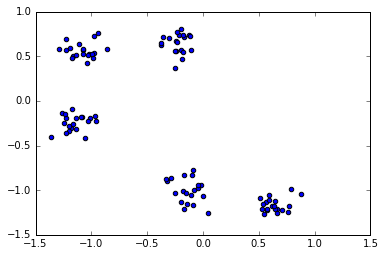

In [116]:
def generate_data(m=10, n=2, num_pts=5, noise=.01):
    centers = np.random.randn(m,1,n)
    
    points = centers + noise*np.random.randn(m,num_pts,n)
    
    points = points.reshape(m*num_pts, n)
    
    labels = np.zeros((m, num_pts))
    
    for i in range(m):
        labels[i,:] += i
    
    labels = labels.flatten()
    labels = labels.astype(int)
    labels_oh = np.zeros((m*num_pts, m))
    labels_oh[np.arange(m*num_pts), labels] = 1
    
    return points, labels_oh

m = 5 #number of categories

n = 2 #dimension of input points

num_pts = 20 #number of points per category

noise = 0.1
    
X,Y = generate_data(m, n, num_pts, noise)

print Y.shape[1]

%matplotlib inline
plt.scatter(X[:,0], X[:,1])
plt.show()

In [118]:
A = cp.Variable((m,n))

problem = cp.Problem(cp.Minimize(objective_fn(X, Y, A)))

problem.solve()

print A.value

[[0.97202759 1.1290074 ]
 [1.2581263  0.55328895]
 [2.75599796 1.99116337]
 [0.6004615  0.58070854]
 [2.82375212 1.21684299]]
